In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In order to see the full analysis, run all cells before looking through the markdown and code. 

A few things that need to be kept in mind while examining this dataset. These are based on observations and, on top of that, it represents only one retail store, so this dataset may not be representative of the whole country or anyother participating retail stores given different demographics of the cities of their location and different income disparities. Given all of these conditions, you can examine my analysis and hopefully find something unexpected or unusual. Enjoy!

In [2]:
#Import all relevant csv files from the kaggle site and reading them into tables
table1 = pd.read_csv("data/BlackFriday.csv")
table1['Marital_Status'] = [["Yes" if i==0 else "No"][0] for i in table1['Marital_Status']]

In [3]:
table1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Yes,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,Yes,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,Yes,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,Yes,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,Yes,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,Yes,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,No,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,No,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,No,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,No,8,NaN,NaN,7871


In [4]:
product_prop = table1.groupby("Gender").count().iloc[:,0]
product_prop.values[1]/product_prop.values[0]

3.0664841108345877

In [5]:
gender_array = table1.loc[:,['User_ID', 'Gender']].groupby(['User_ID']).first().values
female_values = sum([i=='F' for i in gender_array])
male_values = len(gender_array) - female_values
product = table1.groupby("Gender").count().iloc[:,0]
product_prop = product.values[1]/product.values[0]
print("There are " + str(female_values[0]) + " females observed in this retail store and " 
      + str(male_values[0]) + " males observed. The proportion between male and female can be represented as " 
      + str(male_values[0]/female_values[0]) + ". Taking into account the number of products that were bought by each"
      + " individual, the proportion is " + str(product_prop) + ".")


There are 1666 females observed in this retail store and 4225 males observed. The proportion between male and female can be represented as 2.536014405762305. Taking into account the number of products that were bought by each individual, the proportion is 3.0664841108345877.


Text(0.5,1,'With Products Pie Chart')

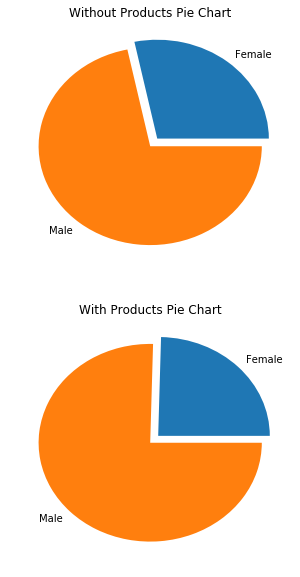

In [6]:
f, axarr = plt.subplots(2)
f.set_figheight(10)
f.set_figwidth(5)
size1 = [female_values[0], male_values[0]]
size2 = [product.values[0], product.values[1]]
labels = ['Female', 'Male']
explode = [0.1,0]
axarr[0].pie(size1, explode = explode, labels = labels)
axarr[0].set_title("Without Products Pie Chart")
axarr[1].pie(size2, explode = explode, labels = labels)
axarr[1].set_title("With Products Pie Chart")


I realized that as I was attempting to differentiate between the genders, there was multiple products per individual thus there were repeated values for each user based on how many different products they purchased which does not show a "fair" representation of this datasets proportion of male-female numbers. It is in fact very different from the 300% which would have been achieved if I had not taken into account for the multiple products showing 2 siginificant conclusions:

1. There are about 250% more males going to this retail store during Black Friday then females
2. Males are buying more products than females.

The first conclusion should be apparent, but the second conclusion arises from the understanding that the proportion between male and female increases significantly when products are accounted for suggesting that males purchase more products on Black Friday.

Of course, there are lapses in logic here, such as during that day there may have been a lot of coincidence in the results. This is in no way concrete! But it is fun to examine it, and see if these results replicate anything else in your life. **ALSO, I do recongize that pie charts are terrible to make significant understanding, but since these values were very simple, I figured it would be the only nice area to use it.**

In [7]:
product_age = table1.groupby("Age").count().iloc[:,0]
wo_product_age = table1.loc[:,["User_ID","Age"]].groupby("User_ID").first().groupby("Age").size()
df = pd.DataFrame({'W/ Product Age': product_age, 'W/O Product Age': wo_product_age})
df['Difference'] = np.array([i/sum(df.iloc[:,0]) for i in df.iloc[:,0]]) - np.array([i/sum(df.iloc[:,1]) 
                                                                                     for i in df.iloc[:,1]])
df

,W/ Product Age,W/O Product Age,Difference
Age,,,
0-17,14707,218,-0.009648
18-25,97634,1069,0.000155
26-35,214690,2053,0.050868
36-45,107499,1167,0.001871
46-50,44526,531,-0.007310
51-55,37618,481,-0.011673
55+,20903,372,-0.024263


In [8]:
copy = df.drop(columns = 'Proportion')
copy['W/O Product Age'] = copy['W/O Product Age']/sum(copy['W/O Product Age'])
copy['W/ Product Age'] = copy['W/ Product Age']/sum(copy['W/ Product Age'])
copy['Age'] = copy.index
copy = pd.melt(copy, id_vars = ['Age'], value_vars = ["W/ Product Age", "W/O Product Age"]).rename(columns ={"variable":
                                                                                                    "Normalized Age"})
ax = sns.barplot(data = copy, x = 'Age', y = 'value', hue = 'Normalized Age')
ax.set_title("Normalized Age of Product versus without Product Ages")
ax.set_ylabel("count proportion")

ValueError: labels ['Proportion'] not contained in axis

Above there are a few things visualized. First there are 4 columns, the first being "AGE". This represents the observed age groups, from 0-17 to 55+, taking into account all observed age groups. The second column represents with product age group, so the sum of the number of people and number of products they purchased within each individual age group. The third column represents the without product age group, which represents the sum of the unique people within each group without taking into account the number of products they purchased. The fourth column is the Difference column which represents the difference between the normalized values, showing whether there has been a general increase from with product to without product. If the value is negative, it means that without product had greater weight, vice versa.

This leads us to a few conclusions:
1. The majority of people seems to be centered at 26-35.
2. It seems to follow a normal graph that may be slightly skewed to the right, where the center is around the majority.
3. Comparing the normalized graphs, there does not seem to be any significant difference in values, suggesting that there is little disparity between the age of people and the number of products they are purchasing. 

Obviously, these conclusions come with a lot of room for error, where the observations may have been misleading because they may have been done by eye and if so, then there may have been an extreme bias to put everyone into the late 20s, early 30s column. Also, if done by eye, above a certain age, it is difficult to differentiate the age by eye, so it becomes increasingly unreliable, thus this analysis may be flawed.

In [ ]:
#Importing bokeh package and its dependencies
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure

In [ ]:
marital_stay = table1.groupby("User_ID").first().groupby(["Stay_In_Current_City_Years", "Marital_Status"]).size()
output_file("stacked.html")

stay = np.array(marital_stay.index.levels[0])
married = np.array(marital_stay.index.levels[1])
colors = ["#c9d9d3", "#718dbf"]


data = {'stay' : stay,
        married[0]: marital_stay.loc[:,married[0]],
        married[1]: marital_stay.loc[:,married[1]]}

p = figure(x_range=stay, title="Number of Users married and years in city",)

p.vbar_stack(married, x='stay', width=0.9, color=colors, source=data,
             legend=[value(x) for x in married])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)
marital_stay

As the table visible above, the correlation of marital status and the number of years in the city seems to be random, where there is continuously less "No" across all years stayed than "Yes". The nice thing about this graph, is that you can visualize the stacked bar graph where the x represents the years residing in the city, while you can differentiate between the number of married people versus the number of unmarried people while differentiating between the total values for each unqiue years. 

**The graph is visible under the project files, named stacked.html .**

Ultimately this project demonstrates how even with a relatively small dataset, you can obtian significant findings given the restrictions that are associated with the findings, such as in that neighborhood for that retail store, and other such discrepancies. Even with that, with these findings the company can change their marketing techniques with a stronger understanding of what demographics they should focus on attracting. 